# IVSCC Morphology Data Analysis Pipeline

In [ ]:
# Author: Xiaoxiao Liu,  xiaoxiaol@alleninstitute.org
## Date: 10/31/2015

In [1]:
%matplotlib inline
import pandas as pd
import os
import platform
import sys
import numpy as np



# Module PATHs
if (platform.system() == "Linux"):
        WORK_PATH = "/local1/xiaoxiaol/work"
else:
        WORK_PATH = "/Users/xiaoxiaoliu/work"
        
        
        
p =  WORK_PATH + '/src/cell-type-analysis'
sys.path.append(p)

sys.path.append(p + '/utilities')
import morph_nfb_2_csv as nfb

sys.path.append(p + '/blast_neuron')
import blast_neuron_comp as bn

        
        
# Data PATHs     
data_dir = WORK_PATH + '/data/lims2/1027_pw_aligned'
preprocessed_dir = data_dir + "/axon_removed" #data_dir + "/preprocessed"
csv_file = data_dir + "/pw_aligned.csv"  ## where the transform parameters are, obtained from lims
origin_data_DIR = data_dir + "/original"



gl_feature_names = ['num_nodes', 'soma_surface', 'num_stems', 'average_diameter','num_bifurcations', 'num_branches', 'num_of_tips',
         'overall_width', 'overall_height', 'overall_depth', 'average_diameter', 'total_length',
         'total_surface', 'total_volume', 'max_euclidean_distance', 'max_path_distance', 'max_branch_order',
         'average_contraction', 'average fragmentation', 'parent_daughter_ratio', 'bifurcation_angle_local',
         'bifurcation_angle_remote','height_width_ratio','average_branch_length','length_surface_ratio']



# remove scales
gl_feature_names_inv = ['num_nodes', 'soma_surface', 'num_stems', 'num_bifurcations', 'num_branches', 'num_of_tips',
     'average_diameter', 'total_length',
     '', 'total_volume', 'max_euclidean_distance', 'max_path_distance', 'max_branch_order',
     'average_contraction', 'average fragmentation', 'parent_daughter_ratio', 'bifurcation_angle_local',
     'bifurcation_angle_remote']

gmi_feature_names = ['moment1', 'moment2', 'moment3', 'moment4', 'moment5', 'moment6', 'moment7', 'moment8',
     'moment9', 'moment10', 'moment11', 'moment12', 'moment13'] ### removed ave_R


all_feature_names = gl_feature_names
all_feature_names.extend(gmi_feature_names)

drop_features= ['num_nodes','soma_surface','average_diameter','total_surface','total_volume','length_surface_ratio']
feature_names = [item for item in all_feature_names if item not in drop_features]
print feature_names


['num_stems', 'num_bifurcations', 'num_branches', 'num_of_tips', 'overall_width', 'overall_height', 'overall_depth', 'total_length', 'max_euclidean_distance', 'max_path_distance', 'max_branch_order', 'average_contraction', 'average fragmentation', 'parent_daughter_ratio', 'bifurcation_angle_local', 'bifurcation_angle_remote', 'height_width_ratio', 'average_branch_length', 'moment1', 'moment2', 'moment3', 'moment4', 'moment5', 'moment6', 'moment7', 'moment8', 'moment9', 'moment10', 'moment11', 'moment12', 'moment13']


###################################
# Preprocessing SWC files (alignment)
###################################

In [ ]:
# Pull Data From Lims  
##  run sql to grab both alignment paraemters and swc file locations and associated meta info
### pia_alignment_transforms.sql
### save to pw_aligned.csv
### To obtain available swc files and corresponding database tags ( dendrite_type, layer info) :
### query_nr_va_ephys_qc.sql
### save to ephys_qc_filtered.csv

### Review spreadsheets and fix db erros (missing alignment parameters, etc.)

In [5]:
# Download/copy swc files 

## python ../utilities/downloadSWC_filter.py  -i ~/work/data/lims2/0923_pw_aligned/0923_pw_aligned.csv	 -o ~/work/data/lims2/0923_pw_aligned/original

In [4]:
# Apply Pia-WhiteMatter Alignments
import applyPiaTransformToSWCs as pwTrans


transform_DIR = data_dir + "/transforms"  ## where to store the transform.txt
output_DIR = data_dir + "/pw_aligned"



## generate transform txt files
if not os.path.exists(transform_DIR):
    os.makedirs(transform_DIR)

pwTrans.generateTransformFilesfromCSV(transform_DIR, csv_file)

## apply transforms to swc files
if not os.path.exists(output_DIR):
    os.makedirs(output_DIR)

df = pd.read_csv(csv_file)
df = df[df.specimen_id != 464326095]  # this specimenid's alignments are wrong
data_table = df.values
num_samples, num_cols = data_table.shape


for i in range(num_samples):
    orca_path = data_table[i][num_cols - 1]
    fn = orca_path.split('/')[-1]
    transform_fn = transform_DIR + "/%s.txt" % fn.split('.swc')[0]
    output_fn = output_DIR + "/" + fn
    pwTrans.applyTransformBySpecimenName(origin_data_DIR + '/' + fn, transform_fn, output_fn)
    
bn.genLinkerFile(output_DIR, output_DIR+"/mylinker.ano")

 /local1/xiaoxiaol/work/v3d/v3d_external/bin/vaa3d -x affine_transform_swc -f apply_transform  -i /Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/original/Cux2-CreERT2_Ai14-198017.05.01.01_488497374_m.swc -o /Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/pw_aligned/Cux2-CreERT2_Ai14-198017.05.01.01_488497374_m.swc -p /Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/transforms/Cux2-CreERT2_Ai14-198017.05.01.01_488497374_m.txt
 /local1/xiaoxiaol/work/v3d/v3d_external/bin/vaa3d -x affine_transform_swc -f apply_transform  -i /Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/original/Gad2-IRES-Cre_Ai14_IVSCC_-172679.03.01.01_471076778_m.swc -o /Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/pw_aligned/Gad2-IRES-Cre_Ai14_IVSCC_-172679.03.01.01_471076778_m.swc -p /Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/transforms/Gad2-IRES-Cre_Ai14_IVSCC_-172679.03.01.01_471076778_m.txt
 /local1/xiaoxiaol/work/v3d/v3d_external/bin/vaa3d -x affine_transform_swc -f apply_transform  -i /U

In [22]:
# Remove Axons
import remove_axons as ra


df = pd.read_csv(data_dir +'/pw_aligned/mylinker.ano', header=None)

output_dir = data_dir +'/axon_removed'


if not os.path.exists(output_dir):
        os.mkdir(output_dir)

for i in range(df.shape[0]):
     swc_file = df.iloc[i,0]
     swc_file= swc_file[8:]
     output_swc_file = output_dir +'/'+swc_file.split('/')[-1]
     #print output_swc_file
     ra.remove_swc_by_id(2, swc_file, output_swc_file)


/local1/xiaoxiaol/work/data/lims2/1027_pw_aligned/axon_removed/Cux2-CreERT2_Ai14-198017.05.01.01_488497374_m.swc
/local1/xiaoxiaol/work/data/lims2/1027_pw_aligned/axon_removed/Gad2-IRES-Cre_Ai14_IVSCC_-172679.03.01.01_471076778_m.swc
/local1/xiaoxiaol/work/data/lims2/1027_pw_aligned/axon_removed/Gad2-IRES-Cre_Ai14_IVSCC_-172679.05.01.01_485247448_m.swc
/local1/xiaoxiaol/work/data/lims2/1027_pw_aligned/axon_removed/Gad2-IRES-Cre_Ai14_IVSCC_-177637.02.02.01_475124390_m.swc
/local1/xiaoxiaol/work/data/lims2/1027_pw_aligned/axon_removed/Htr3a-Cre_NO152_Ai14-175479.06.02.01_488465816_m.swc
/local1/xiaoxiaol/work/data/lims2/1027_pw_aligned/axon_removed/Htr3a-Cre_NO152_Ai14_IVSCC_-175481.02.02.01_475459187_m.swc
/local1/xiaoxiaol/work/data/lims2/1027_pw_aligned/axon_removed/Htr3a-Cre_NO152_Ai14_IVSCC_-175482.03.02.01_475124358_m.swc
/local1/xiaoxiaol/work/data/lims2/1027_pw_aligned/axon_removed/Htr3a-Cre_NO152_Ai14_IVSCC_-177968.02.01.01_488423071_m.swc
/local1/xiaoxiaol/work/data/lims2/1027_

###########################################
# Feature Calculation
###########################################

In [13]:
# Feature Calculation  ( TAKES A WHILE)
import run_feature_calculation as feacal
reload(feacal)


db_tags_csv_file = data_dir + '/ephys_qc_filtered.csv' 

    
    
## run blast neuron  features
feacal.cal_bn_features(preprocessed_dir)

## clean up db tags
## remove alignment outliers?
df_db_tags= feacal.cleanup_query_csv(db_tags_csv_file)

## merge all info
df_features = pd.read_csv(preprocessed_dir + '/features_with_tags.csv')

swc_file_names2 = []
for i in range(df_features.shape[0]):
        swc_fn = df_features.swc_file[i].split('/')[-1]
        swc_file_names2.append(swc_fn)
df_features['swc_file_name'] = pd.Series(swc_file_names2)

merged = pd.merge(df_db_tags, df_features, how='inner', on=['swc_file_name'])
merged.drop(['orca_path', 'swc_file_name', 'region_info'], axis=1, inplace=True)


# add three more tags
# modify height width depth

merged.to_csv(preprocessed_dir + '/features_with_db_tags.csv', index=False)


/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/axon_removed/Cux2-CreERT2_Ai14-198017.05.01.01_488497374_m.swc
/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/axon_removed/Gad2-IRES-Cre_Ai14_IVSCC_-172679.03.01.01_471076778_m.swc
/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/axon_removed/Gad2-IRES-Cre_Ai14_IVSCC_-172679.05.01.01_485247448_m.swc
/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/axon_removed/Gad2-IRES-Cre_Ai14_IVSCC_-177637.02.02.01_475124390_m.swc
/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/axon_removed/Htr3a-Cre_NO152_Ai14-175479.06.02.01_488465816_m.swc
/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/axon_removed/Htr3a-Cre_NO152_Ai14-178904.04.01.01_488744290_m.swc
/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/axon_removed/Htr3a-Cre_NO152_Ai14-182004.05.02.01_488702448_m.swc
/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/axon_removed/Htr3a-Cre_NO152_Ai14-185347.04.01.01_488445387_m.swc
/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/a

In [14]:
## Add extra features

df_f = pd.read_csv(preprocessed_dir + '/features_with_db_tags.csv')

#df_f.columns =  [ u'specimen_id', u'specimen_name', u'dendrite_type',
#        u'cre_line', u'layer', u'swc_file', u'num_nodes', u'soma_surface',
#        u'num_stems', u'num_bifurcations', u'num_branches', u'num_of_tips',
#        u'overall_depth', u'overall_width', u'overall_height',
#        u'average_diameter', u'total_length', u'total_surface', u'total_volume',
#        u'max_euclidean_distance', u'max_path_distance', u'max_branch_order',
#        u'average_contraction', u'average fragmentation',
#        u'parent_daughter_ratio', u'bifurcation_angle_local',
#        u'bifurcation_angle_remote', u'moment1', u'moment2', u'moment3',
#        u'moment4', u'moment5', u'moment6', u'moment7', u'moment8', u'moment9',
#        u'moment10', u'moment11', u'moment12', u'moment13', u'avgR']

df_f['height_width_ratio'] = df_f['overall_height']/df_f['overall_width']

df_f['average_branch_length'] = df_f['total_length']/df_f['num_branches']

df_f ['length_surface_ratio'] = df_f ['total_length']/df_f['total_surface']


##  TODO: !!!! correct height width depth

df_f.to_csv(preprocessed_dir + '/features_with_db_tags_added.csv',index=False)

######################################################
# Data Curation 
######################################################

In [ ]:
# Curate data for clustering

In [15]:
# merge meta info
import merge_meta_info as mmi
import numpy as np


all_feature_file = preprocessed_dir+ '/features_with_db_tags_added.csv'
output_dir = data_dir + '/clustering_results'

#Meta_CSV_FILE = data_dir + '/IVSCC_qual_calls_XiaoXiao_150cells_092915-UPDATED3.csv'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


## generate creline specific anos
mmi.generateLinkerFileFromCSV(preprocessed_dir, all_feature_file ,"cre_line",False)



In [16]:
# MAUNUAL : Identify Outliers ( Alignment errors, db logging erros)
## save to wrong_scale.csv
to_remove_filename = data_dir +'/wrong_scale_to_remove.csv'

In [34]:
# require the following col names in the merged spread sheet
col_names = ['specimen_id','specimen_name','cre_line','layer','dendrite_type','swc_file']#,'types']
col_names.extend(feature_names)


# remove outliers identified in
df_remove  = pd.read_csv(to_remove_filename)
df_complete = pd.read_csv(all_feature_file)
df_complete_filter = df_complete[~df_complete['specimen_name'].isin(df_remove['specimen_name'])]


# !!!!! df_complete_filter drop  dendrite_type and layer

#df_meta = pd.read_csv(Meta_CSV_FILE)
#merged = pd.merge(df_complete_filter,df_meta,how='inner',on=['specimen_name'])

merged = df_complete_filter
merged = merged[col_names]
merged[feature_names] = merged[feature_names].astype(float)


output_merged_csv = data_dir +'/meta_merged_allFeatures.csv'
merged.to_csv(output_merged_csv,index=False)

#generateLinkerFileFromCSV(output_dir, output_merged_csv,'cre_line',False)

mmi.generateLinkerFileFromCSV(output_dir, output_merged_csv,None,False)

#output_dir= data_DIR + '/figures/staci_types'
#generateLinkerFileFromCSV(output_dir, output_merged_csv,'types',False)
#swc_screenshot_folder =  data_dir + "/figures/pw_aligned_bmps"
#types = np.unique(merged['types'])
#for type in types:
#    print type
#    df_type = merged[merged.types == type]
#    type_format_string = '_'.join(type.split(" "))
#    mmi.copySnapshots(df_type, swc_screenshot_folder, output_dir + '/' +type_format_string )
#    mmi.assemble_screenshots(output_dir + '/' + type_format_string, output_dir + '/' +type_format_string+ '_assemble.png', 128)





################################################
# Clustering and Visualizations
################################################

There are 175 neurons in this dataset
highly correlated:[num_bifurcations, num_branches ]
highly correlated:[num_bifurcations, num_of_tips ]
highly correlated:[overall_depth, max_euclidean_distance ]
highly correlated:[overall_depth, max_path_distance ]
highly correlated:[total_length, moment1 ]
highly correlated:[moment5, moment6 ]
highly correlated:[moment5, moment12 ]
remove num_branches
remove num_of_tips
remove max_euclidean_distance
remove max_path_distance
remove moment1
remove moment6
remove moment12
 The 24 features that are not closely correlated are ['num_stems' 'num_bifurcations' 'overall_width' 'overall_height'
 'overall_depth' 'total_length' 'max_branch_order' 'average_contraction'
 'average fragmentation' 'parent_daughter_ratio' 'bifurcation_angle_local'
 'bifurcation_angle_remote' 'height_width_ratio' 'average_branch_length'
 'moment2' 'moment3' 'moment4' 'moment5' 'moment7' 'moment8' 'moment9'
 'moment10' 'moment11' 'moment13']



 ***************  affinity propogation

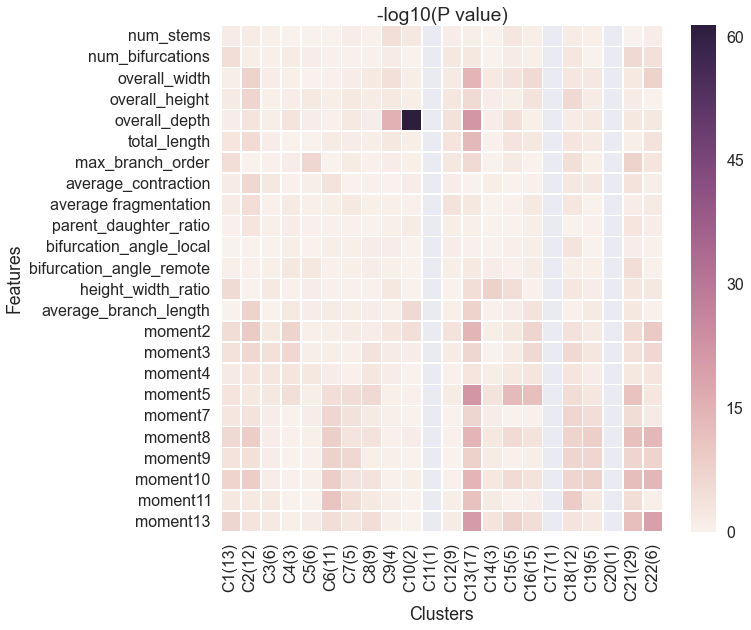

dunn index is 0.196143


In [23]:
import morph_cluster as mc
reload(mc)

import matplotlib
import numpy as np
import matplotlib.pyplot as pl

all_feature_merged_file = data_dir + '/meta_merged_allFeatures.csv'
output_dir = data_dir + '/clustering_results'
#swc_screenshot_folder =  data_DIR + "/figures/pw_aligned_bmps"

if not os.path.exists(output_dir):
        os.mkdir(output_dir)

merged = pd.read_csv(all_feature_merged_file)

print "There are %d neurons in this dataset" % merged.shape[0]
        
redundancy_removed_features_names = mc.remove_correlated_features(merged, np.array(feature_names), 0.95)
print(" The %d features that are not closely correlated are %s" % (
        len(redundancy_removed_features_names), redundancy_removed_features_names))


swc_screenshot_folder = None

REMOVE_OUTLIERS = 0
postfix = "_all_ol_clipped"

# Affinyty Propogation
num_clusters, dunn_index1 = mc.affinity_propagation(merged, redundancy_removed_features_names,output_dir + '/ap' + postfix)





  ***************  ward computation, max_cluster = 10  *************:
Found 38  |z score| > 3.500000 in zscore matrix :
save to /Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/clustering_results/ward_all_ol_clipped/zscore.csv
['Cux2-CreERT2' 'Gad2-IRES-Cre' 'Htr3a-Cre_NO152' 'Nr5a1-Cre' 'Ntsr1-Cre'
 'Pvalb-IRES-Cre' 'Rbp4-Cre_KL100' 'Rorb-IRES2-Cre-D' 'Scnn1a-Tg2-Cre'
 'Scnn1a-Tg3-Cre' 'Slc17a6-IRES-Cre' 'Sst-IRES-Cre']


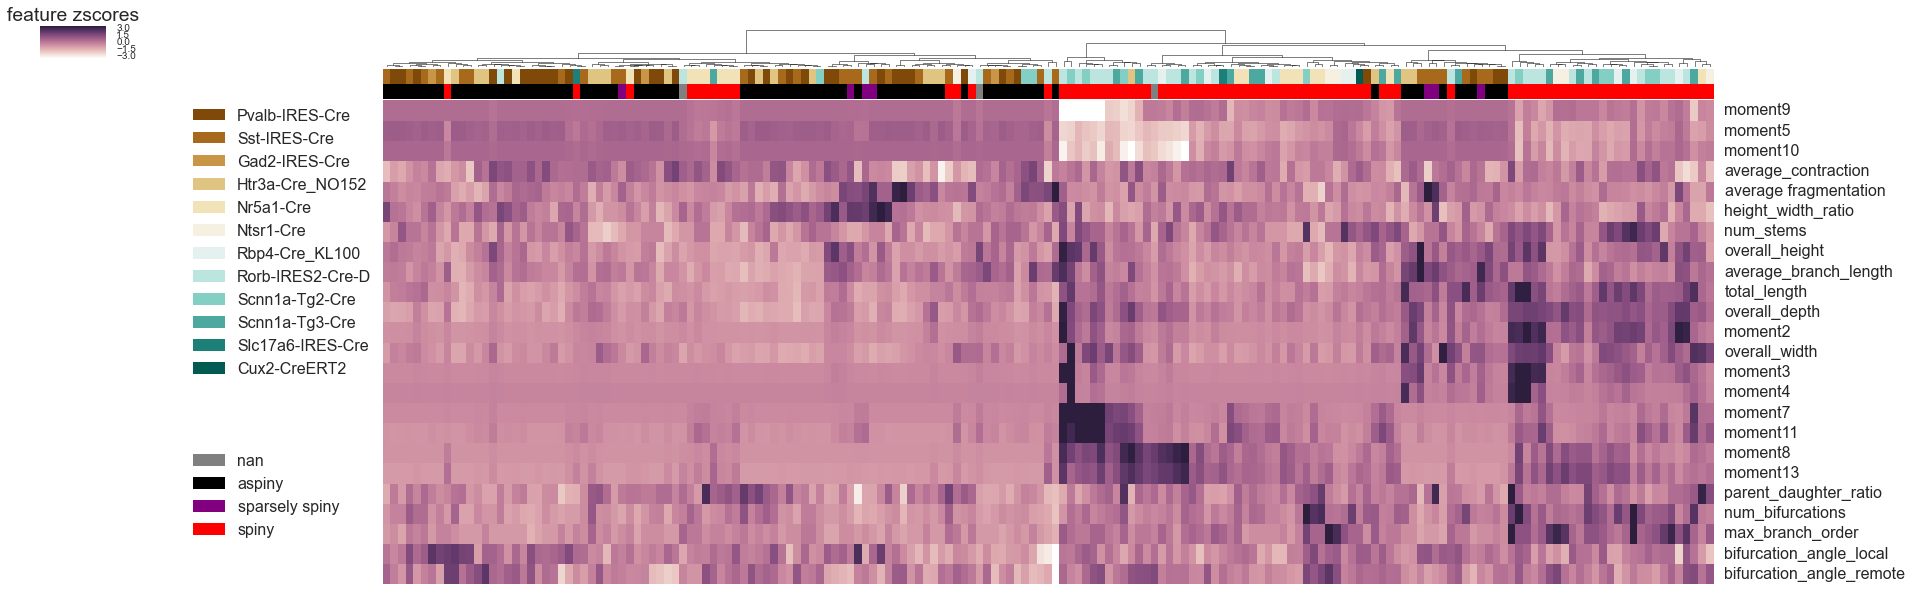

save zscore matrix heatmap figure to :/Users/xiaoxiaoliu/work/data/lims2/1027_pw_aligned/clustering_results/ward_all_ol_clipped/zscore_feature_heatmap.png
There are 10 clusters in total
  58 neurons in cluster 1
no bmp copying from: None
  9 neurons in cluster 2
no bmp copying from: None
  22 neurons in cluster 3
no bmp copying from: None
  2 neurons in cluster 4
no bmp copying from: None
  9 neurons in cluster 5
no bmp copying from: None
  6 neurons in cluster 6
no bmp copying from: None
  28 neurons in cluster 7
no bmp copying from: None
  14 neurons in cluster 8
no bmp copying from: None
  5 neurons in cluster 9
no bmp copying from: None
  22 neurons in cluster 10
no bmp copying from: None


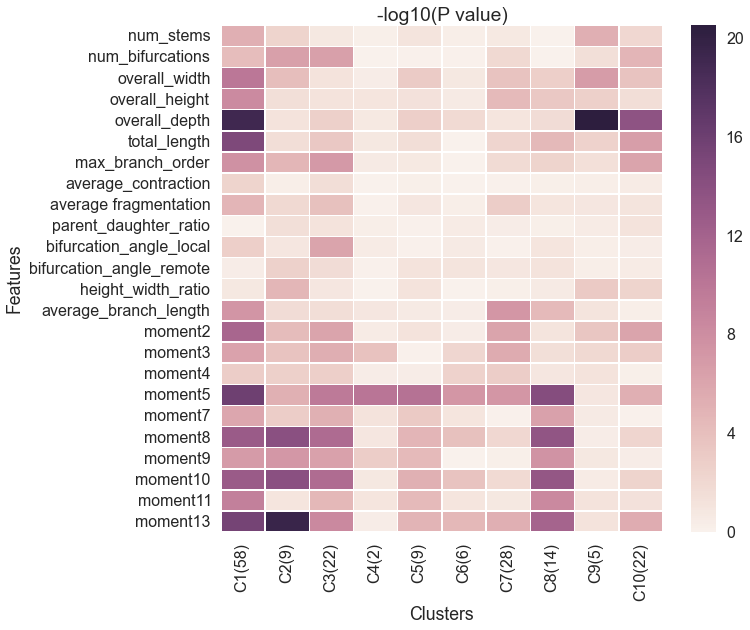

dunn index is 0.221260


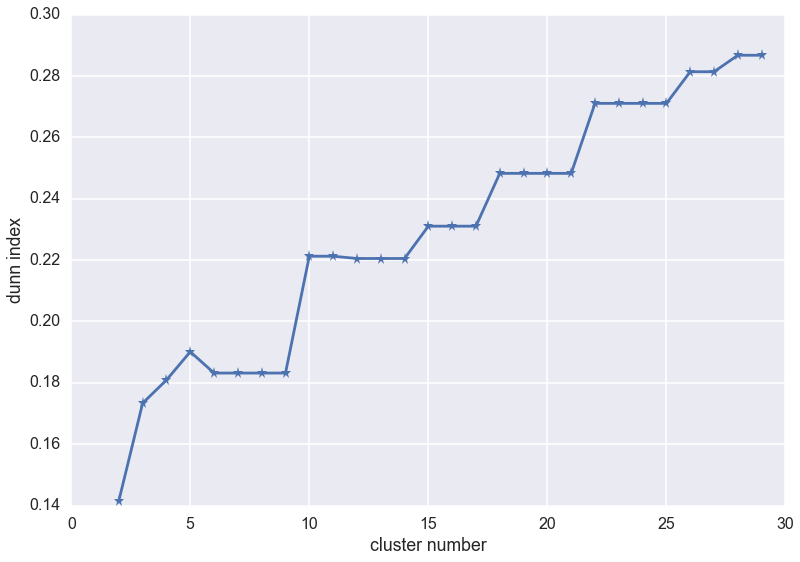

Silhouettee analysis:
('For n_clusters =', 2, 'The average silhouette_score is :', 0.19164247752771527)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.18194150404961013)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.15160267213940623)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.1540492536463948)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.11581892323693611)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.1177913674961195)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.1117475474082901)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.11515508868997383)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.11727618967636638)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.11356596390770472)
('For n_clusters =', 12, 'The average silhouette_score is :', 0.092763677147727805)
('For n_clusters =', 13, 'The average silhouette_score is :', 0.09906431494

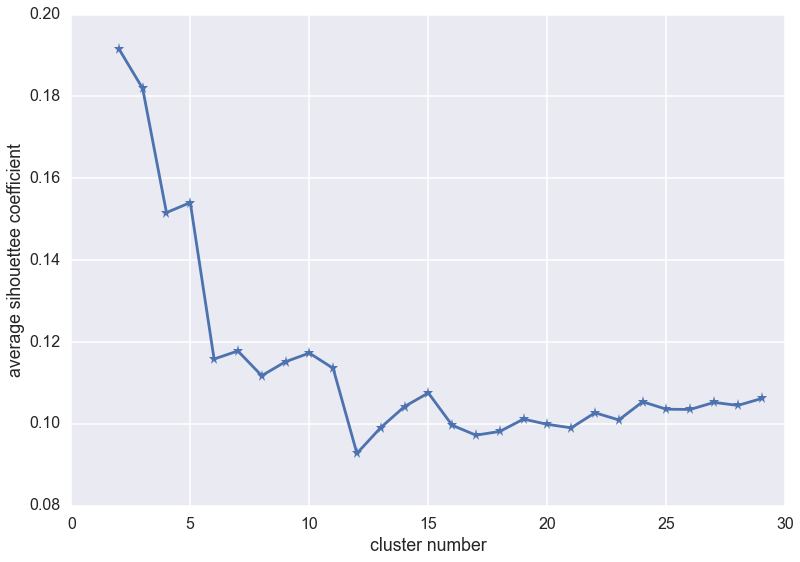

In [28]:
# WARD
reload(mc)
linkage, df_zscores = mc.ward_cluster(merged, redundancy_removed_features_names, 10,output_dir + '/ward' + postfix)
mc.dunnindex_clusternumber(linkage,df_zscores,output_dir + '/ward' + postfix)
mc.silhouette_clusternumber(linkage,df_zscores,output_dir + '/ward' + postfix)